<a href="https://colab.research.google.com/github/omkar-salunke/omkar-salunke.github.io/blob/main/GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyrosm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 42.9 MB/s 
  Using cached pyrobuf-0.9.3-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 2.1 MB 44.1 MB/s 
  Using cached cykhash-2.0.0-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 1.6 MB 47.9 MB/s 
     |████████████████████████████████| 6.3 MB 35.1 MB/s 
     |████████████████████████████████| 16.7 MB 444 kB/s 
  Created wheel for pyrosm: filename=pyrosm-0.6.1-cp37-cp37m-linux_x86_64.whl size=5430432 sha256=df09a0a1bd742c11c1a7504ea5b1dd0008feb82d4b78ea97b25613497334324a
  Stored in directory: /root/.cache/pip/wheels/e8/9e/d8/e424ffc5eaa71ccb122bb79d92ef75802c49b9b0a9366d6da4
Successfully built pyrosm


In [2]:
from pyrosm import get_data
# Download data for the city of Helsinki
fp = get_data("Stuttgart")
print(fp)

Downloaded Protobuf data 'Helsinki.osm.pbf' (32.49 MB) to:
'/tmp/pyrosm/Helsinki.osm.pbf'
/tmp/pyrosm/Helsinki.osm.pbf


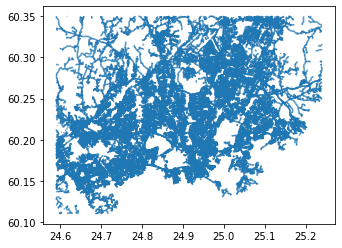

In [4]:
from pyrosm import OSM
# Initialize the OSM parser object
osm = OSM(fp)

# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()


In [13]:
from shapely.geometry import  MultiLineString, mapping, shape
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
print(lines)


MULTILINESTRING ((0 0, 1 1), (-1 0, 1 0))


In [29]:
list_line=[]
for line in df:
     print(line)
     list_line.append(list(line.coords))
# LINESTRING (0 0, 1 1)
# LINESTRING (-1 0, 1 0)

LINESTRING (25.1261162 60.2574597, 25.1270928 60.2576266)
LINESTRING (25.1270928 60.2576266, 25.1279981 60.2577708)
LINESTRING (25.1279981 60.2577708, 25.1292996 60.257962)
LINESTRING (25.1292996 60.257962, 25.1295425 60.2579957)
LINESTRING (25.1295425 60.2579957, 25.1306046 60.2581428)
LINESTRING (25.1306046 60.2581428, 25.1320436 60.2583447)
LINESTRING (25.1320436 60.2583447, 25.1323419 60.2583865)
LINESTRING (25.1323419 60.2583865, 25.1336959 60.2585986)
LINESTRING (25.1336959 60.2585986, 25.1366653 60.2591513)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  


In [30]:
list_line

[[(25.1261162, 60.2574597), (25.1270928, 60.2576266)],
 [(25.1270928, 60.2576266), (25.1279981, 60.2577708)],
 [(25.1279981, 60.2577708), (25.1292996, 60.257962)],
 [(25.1292996, 60.257962), (25.1295425, 60.2579957)],
 [(25.1295425, 60.2579957), (25.1306046, 60.2581428)],
 [(25.1306046, 60.2581428), (25.1320436, 60.2583447)],
 [(25.1320436, 60.2583447), (25.1323419, 60.2583865)],
 [(25.1323419, 60.2583865), (25.1336959, 60.2585986)],
 [(25.1336959, 60.2585986), (25.1366653, 60.2591513)]]

In [34]:
def line_to_coords(geom):
    m = mapping(geom)
    list_of_tuples = m['coordinates'] # alternative -> geom.coords[:]
    list_of_lists = list(map(list, list_of_tuples))
    return list_of_lists

drive_net['coords'] = drive_net.apply(lambda row: line_to_coords(row.geometry), axis=1)


Exception ignored in: <function BaseGeometry.__del__ at 0x7fea5b8ed560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 194, in _empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 


In [38]:
drive_net.coords[0][0][0]

(25.1261162, 60.2574597)